# ICIBM 2021 Tutorial 02 - using EmptyNN

Hyun-Hwan Jeong, Yulin Dai, and Fangfang Yan

This tutorial will show how to use EmptyNN to improve the data quality of scRNA-seq. The following packages are required to install for this tutorial.

In [ ]:
install.packages("caret")
install.packages("Seurat")
install.packages("hdf5r")
devtools::install_github("lkmklsmn/empty_nn")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘bit64’


Skipping install of 'EmptyNN' from a github remote, the SHA1 (fc54b1ad) has not changed since last install.
  Use `force = TRUE` to force installation



We will use unfiltered PBMC 8K dataset.

In [ ]:
 curl::curl_download("https://drive.google.com/uc?export=download&id=1Z1Vxzpu17kWwZGo6f2BMKo9eLjofmdrk", "multiplexed_PBMC_raw.h5")

In [ ]:
library(EmptyNN)
library(Seurat)

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject



First, we need to load a **unfiltered** count file like the following line.

In [ ]:
counts <- Read10X_h5("multiplexed_PBMC_raw.h5", use.names = TRUE, unique.features = TRUE)

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”


EmptyNN method is used as follows, and `k` and `iteration` would normally bigger than the number. We use the number to run the function faster.

In [ ]:
nn.res <- emptynn(t(counts), threshold = 100, k = 5, iteration = 5, verbose = TRUE)

Loading required package: keras

Loading required package: Matrix



[1] "there are 4006 in P set"
[1] "there are 6582 in U set"
[1] "Samples in U set were split into 5 folds"
[1] "data normalization"
[1] "start training"
[1] "iteration 1"


Loading required package: caret

Loading required package: lattice

Loading required package: ggplot2

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


[1] "training fold 1"
[1] "training fold 2"
[1] "training fold 3"
[1] "training fold 4"
[1] "training fold 5"
[1] "iteration 2"
[1] "training fold 1"
[1] "training fold 2"
[1] "training fold 3"
[1] "training fold 4"
[1] "training fold 5"
[1] "iteration 3"
[1] "training fold 1"
[1] "training fold 2"
[1] "training fold 3"
[1] "training fold 4"
[1] "training fold 5"
[1] "iteration 4"
[1] "training fold 1"
[1] "training fold 2"
[1] "training fold 3"
[1] "training fold 4"
[1] "training fold 5"
[1] "iteration 5"
[1] "training fold 1"
[1] "training fold 2"
[1] "training fold 3"
[1] "training fold 4"
[1] "training fold 5"


Once you run EmptyNN, you can find the 

In [ ]:
sc_obj <- CreateSeuratObject(counts = counts[, nn.res$nn.keep])
sc_obj[["mito.percent"]] <- PercentageFeatureSet(sc_obj, pattern = "^MT-")

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


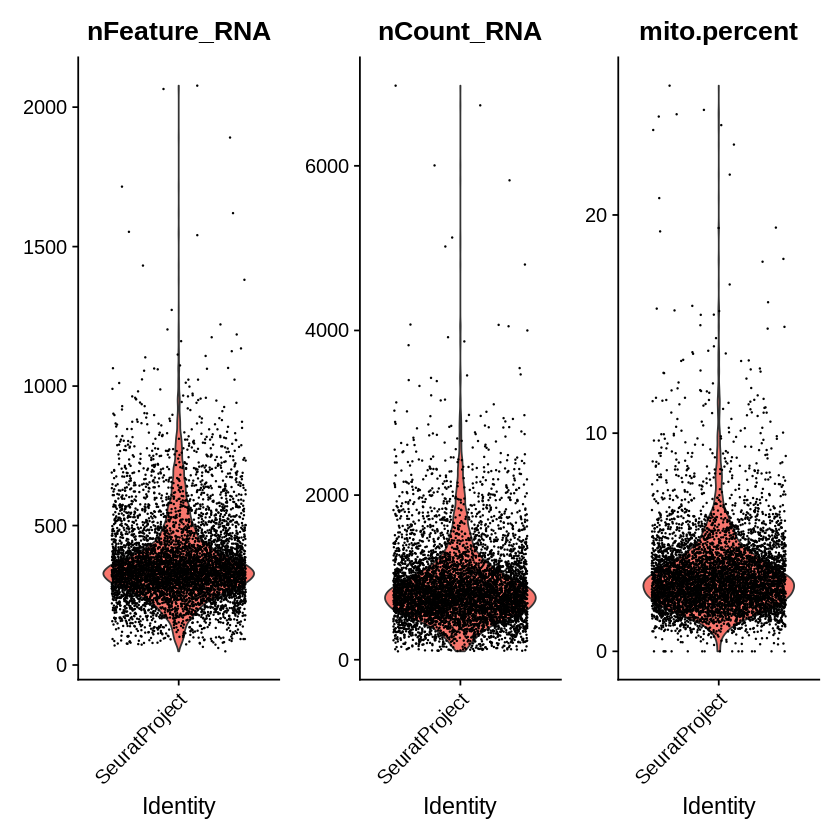

In [ ]:
VlnPlot(sc_obj, features = c("nFeature_RNA", "nCount_RNA", "mito.percent"))

It is a typical Seurat pipeline you may use for your analysis. No parameter optimizations were conducted, and it is an example to demonstrate what will be the next of running EmptyNN.

In [ ]:
sc_obj <- sc_obj %>% 
  NormalizeData() %>% 
  FindVariableFeatures() %>% 
  ScaleData() %>% 
  RunPCA() %>% 
  FindNeighbors(dims = 1:10) %>% 
  FindClusters(resolution=0.5) %>% 
  RunUMAP(dims = 1:10)

Centering and scaling data matrix

PC_ 1 
Positive:  CST3, FCN1, LYZ, S100A9, LST1, AIF1, TYROBP, S100A8, CTSS, FCER1G 
	   LGALS1, SAT1, PSAP, CFD, FTL, COTL1, G0S2, FTH1, S100A6, MS4A6A 
	   S100A4, NPC2, PLAUR, MNDA, HLA-DRA, CD14, IL1B, AP1S2, HLA-DRB1, CPVL 
Negative:  MALAT1, LTB, CCL5, LCK, RPLP0, IL7R, CTSW, CD2, NKG7, IL2RG 
	   GNLY, ISG20, GZMM, SVIP, GZMA, CST7, ITM2A, GYPC, CD247, KLRB1 
	   NOSIP, LBH, MAL, EIF4A2, GZMH, STK17A, GIMAP7, CD8B, SNHG8, GZMB 
PC_ 2 
Positive:  S100A8, HLA-DRA, S100A9, CD79A, LTB, S100A12, TCL1A, LYZ, G0S2, HLA-DQB1 
	   IGLL5, FTH1, NCF1, HLA-DRB1, CD14, CD74, IL8, MS4A1, FCN1, IL1B 
	   FTL, CSF3R, BANK1, PLAUR, LY86, RBP7, CD83, MS4A6A, HLA-DQA1, TREM1 
Negative:  NKG7, GNLY, GZMA, GZMB, CCL5, CST7, CTSW, B2M, GZMH, HOPX 
	   CCL4, KLRB1, KLRD1, PFN1, FCGR3A, GZMM, CMC1, APMAP, CD247, APOBEC3G 
	   ACTB, ID2, CTSC, TMSB4X, MYL12B, PLAC8, S100A4, CLIC1, LYAR, RARRES3 
PC_ 3 
Positive:  S100A8, S100A9, S100A12, NKG7, GNLY, CCL5, TYROBP, IL8, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6247
Number of edges: 214976

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8683
Number of communities: 9
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
21:16:23 UMAP embedding parameters a = 0.9922 b = 1.112

21:16:23 Read 6247 rows and found 10 numeric columns

21:16:23 Using Annoy for neighbor search, n_neighbors = 30

21:16:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:16:24 Writing NN index file to temp file /tmp/RtmplF3H0o/file3c457c8370

21:16:24 Searching Annoy index using 1 thread, search_k = 3000

21:16:27 Annoy recall = 100%

21:16:27 Commencing smooth kNN distance calibration using 1 thread

21:16:28 Initializing from 

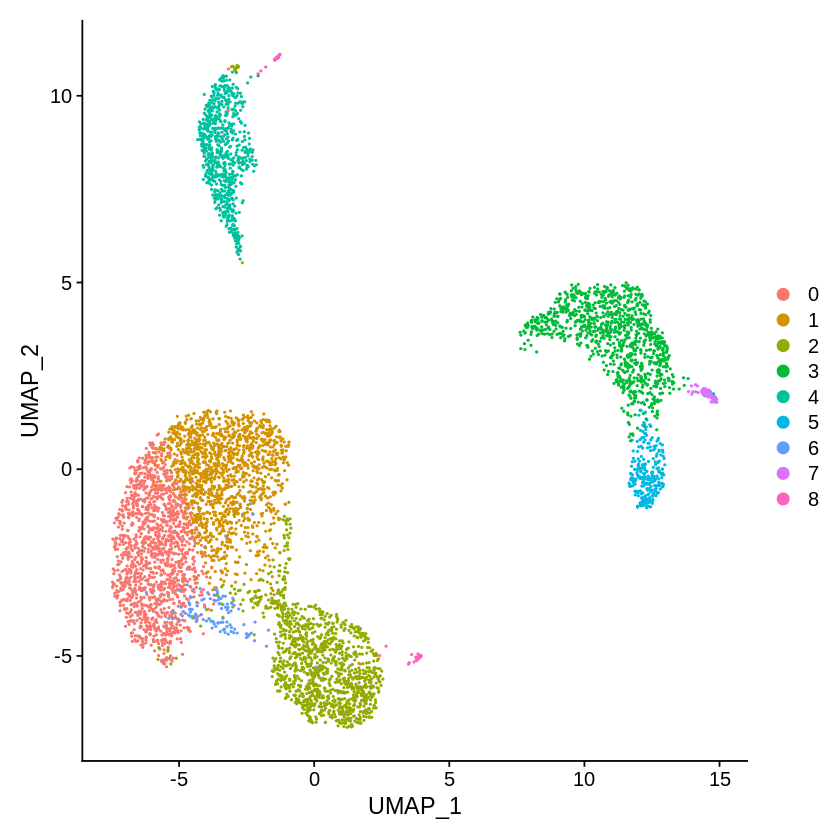

In [ ]:
DimPlot(sc_obj, reduction = "umap")

# FAQ

Q. Do we need to perform hyperparamter optimizations?

Like most of machine-learning methods, EmptyNN also has hyperparameters that need to be tuned - `threshold`, `k`, and `iteration`. EmptyNN paper showed that `threshold` would be the key parameter, but the default parameter (`threshold =100`) is sufficient to run EmptyNN. Furthermore, the paper showed that EmptyNN is robust for other hyperparameters (see the following figures for futher information).

![A picture](https://drive.google.com/uc?id=1h5LlqUTkbPO3BSYaYAPvbG1BBk6ESX86)
